In [64]:
from nltk import FreqDist
from gensim import corpora

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import gensim
%matplotlib inline

D:\Anaconda3\envs\project-env-2\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [44]:
df_appstore_tl = pd.read_csv('df_appstore_tl.csv', index_col=[0])
df_appstore_en = pd.read_csv('df_appstore_en.csv', index_col=[0])

In [45]:
df_appstore_en.head()

,title,date,review,rating,year,month,day,combined_text,prediction1,confidence_level1,prediction2,confidence_level2
0,Gcash user since 2018,2020-06-07 04:57:17,"I've been using gcash for 2 years now, and yes...",5,2020,6,7,Gcash user since 2018 I've been using gcash fo...,__label__en,0.981548,__label__th,0.000830
1,Read please!!,2021-01-12 09:46:26,Those others who doesn’t like gcash don’t expe...,5,2021,1,12,Read please!! Those others who doesn’t like gc...,__label__en,0.963981,__label__de,0.005407
2,Delayed Payment Reflection,2020-07-16 05:22:48,GCash serves as a really convenient way to pur...,2,2020,7,16,Delayed Payment Reflection GCash serves as a r...,__label__en,0.972274,__label__de,0.001312
3,7 years and counting,2021-02-17 09:15:31,Been using gcash for 7 years and I can say it ...,5,2021,2,17,7 years and counting Been using gcash for 7 ye...,__label__en,0.964854,__label__vi,0.001743
4,Worst Customer Service Ever!!!!!!!,2020-07-06 06:55:09,My old account number was blocked and can’t re...,1,2020,7,6,Worst Customer Service Ever!!!!!!! My old acco...,__label__en,0.978832,__label__ru,0.001608


In [23]:
nlp = spacy.load('en_core_web_sm')

nlp.Defaults.stop_words.update(['gcash', 'app']) # add gcash & app as part of stop words since these words are the common words and give no insight.

def tokenizer(text):
    return [token.lemma_.lower() for token in nlp(text) if not token.is_stop and not token.is_punct]

text = 'apple egg'

tokenizer(text)

['apple', 'egg']

In [46]:
# remove unwanted characters, numbers and symbols
df_appstore_en['combined_text'] = df_appstore_en['combined_text'].str.replace("[^a-zA-Z#]", " ")

#lower case the reviews
df_appstore_en['combined_text'] = df_appstore_en['combined_text'].apply(lambda x: x.lower())

<ipython-input-46-b3bda8f45a4f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_appstore_en['combined_text'] = df_appstore_en['combined_text'].str.replace("[^a-zA-Z#]", " ")


In [47]:
df_appstore_en.head()

,title,date,review,rating,year,month,day,combined_text,prediction1,confidence_level1,prediction2,confidence_level2
0,Gcash user since 2018,2020-06-07 04:57:17,"I've been using gcash for 2 years now, and yes...",5,2020,6,7,gcash user since i ve been using gcash fo...,__label__en,0.981548,__label__th,0.000830
1,Read please!!,2021-01-12 09:46:26,Those others who doesn’t like gcash don’t expe...,5,2021,1,12,read please those others who doesn t like gc...,__label__en,0.963981,__label__de,0.005407
2,Delayed Payment Reflection,2020-07-16 05:22:48,GCash serves as a really convenient way to pur...,2,2020,7,16,delayed payment reflection gcash serves as a r...,__label__en,0.972274,__label__de,0.001312
3,7 years and counting,2021-02-17 09:15:31,Been using gcash for 7 years and I can say it ...,5,2021,2,17,years and counting been using gcash for ye...,__label__en,0.964854,__label__vi,0.001743
4,Worst Customer Service Ever!!!!!!!,2020-07-06 06:55:09,My old account number was blocked and can’t re...,1,2020,7,6,worst customer service ever my old acco...,__label__en,0.978832,__label__ru,0.001608


In [48]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [49]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
newStopWords = ['gcash','app']
stop_words.extend(newStopWords)

In [50]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

In [51]:
# remove short words (length < 2)
df_appstore_en['combined_text'] = df_appstore_en['combined_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df_appstore_en['combined_text']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

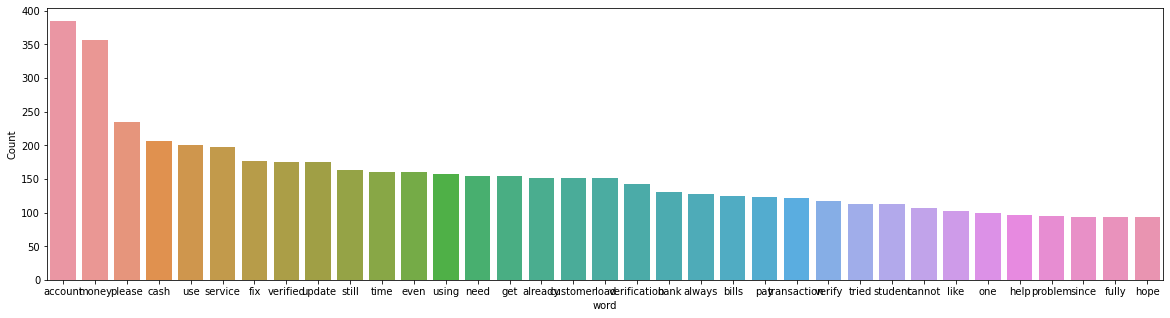

In [52]:
freq_words(reviews, 35)

In [54]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [59]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
#        output = []
#        for sent in texts:
#              doc = nlp(" ".join(sent)) 
#              output.append([token.lemma_ for token in doc if token.pos_ in tags])
#        return output

def lemmatization(texts): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc])
       return output

In [60]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['read', 'please', 'others', 'like', 'expect', 'much', 'everything', 'want', 'give', 'others', 'error', 'maybe', 'give', 'little', 'patience', 'think', 'time', 'giving', 'challenge', 'like', 'give', 'patience', 'really', 'need', 'time', 'maybe', 'try', 'solve', 'problem', 'first', 'dramatically', 'crazy', 'anyways', 'base', 'experience', 'get', 'people', 'realize', 'hurting', 'nobody', 'cares', 'maybe', 'least', 'try', 'solve', 'problems', 'people', 'close', 'make', 'things', 'even', 'true', 'start', 'girl', 'hurting', 'girls', 'boys', 'well', 'things', 'said', 'right', 'happy', 'using', 'bye', 'anyways', 'sorry', 'telling', 'feelings', 'take', 'anymore']


In [61]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['read', 'please', 'other', 'like', 'expect', 'much', 'everything', 'want', 'give', 'other', 'error', 'maybe', 'give', 'little', 'patience', 'think', 'time', 'give', 'challenge', 'like', 'give', 'patience', 'really', 'need', 'time', 'maybe', 'try', 'solve', 'problem', 'first', 'dramatically', 'crazy', 'anyways', 'base', 'experience', 'get', 'people', 'realize', 'hurt', 'nobody', 'care', 'maybe', 'least', 'try', 'solve', 'problem', 'people', 'close', 'make', 'thing', 'even', 'true', 'start', 'girl', 'hurt', 'girl', 'boy', 'well', 'thing', 'say', 'right', 'happy', 'use', 'bye', 'anyways', 'sorry', 'tell', 'feeling', 'take', 'anymore']


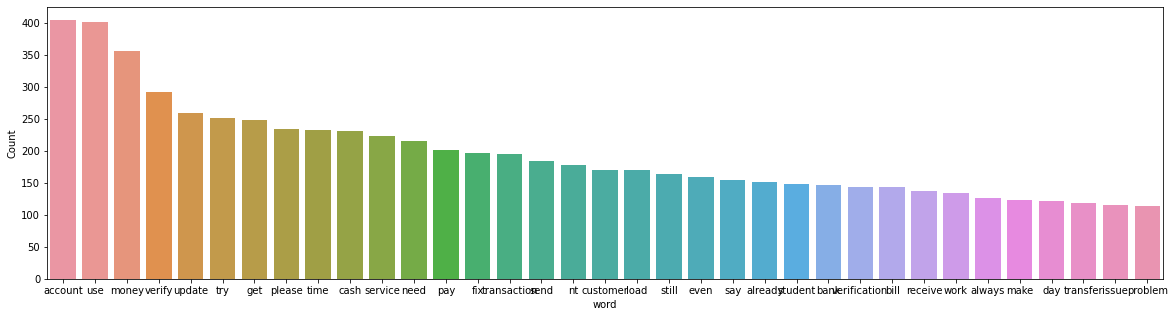

In [63]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df_appstore_en['reviews'] = reviews_3

freq_words(df_appstore_en['reviews'], 35)

In [65]:
dictionary = corpora.Dictionary(reviews_2)

In [66]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [67]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=8,
                chunksize=1000, passes=50)

In [68]:
lda_model.print_topics()

[(0,
  '0.036*"account" + 0.028*"verify" + 0.023*"update" + 0.022*"money" + 0.019*"try" + 0.017*"time" + 0.016*"use" + 0.016*"get" + 0.015*"keep" + 0.014*"verification"'),
 (1,
  '0.030*"use" + 0.023*"pay" + 0.019*"bill" + 0.017*"please" + 0.013*"say" + 0.012*"try" + 0.012*"name" + 0.012*"cash" + 0.012*"need" + 0.010*"money"'),
 (2,
  '0.043*"student" + 0.024*"nt" + 0.021*"verify" + 0.020*"even" + 0.018*"ca" + 0.015*"please" + 0.014*"give" + 0.013*"get" + 0.011*"issue" + 0.011*"need"'),
 (3,
  '0.066*"code" + 0.032*"receive" + 0.031*"email" + 0.030*"send" + 0.017*"verification" + 0.016*"number" + 0.016*"fix" + 0.015*"try" + 0.015*"time" + 0.014*"log"'),
 (4,
  '0.026*"service" + 0.023*"money" + 0.023*"customer" + 0.021*"load" + 0.019*"cash" + 0.018*"transaction" + 0.014*"poor" + 0.012*"account" + 0.012*"card" + 0.011*"bank"')]